## The problem of overfitting and regularization

### An overfitting model

Iteration      0: Cost = 0.10977
Iteration   5000: Cost = 0.00378
Iteration  10000: Cost = 0.00299
Iteration  15000: Cost = 0.00274
Iteration  20000: Cost = 0.00264
Iteration  25000: Cost = 0.00259
Iteration  30000: Cost = 0.00254
Iteration  35000: Cost = 0.00251
Iteration  40000: Cost = 0.00247
Iteration  45000: Cost = 0.00244
w = [ 0.90013496 -0.2811353  -0.7398537   0.93132215  2.48201456  2.91811401
  2.13027821  0.36417183 -2.05623083 -4.84112052], b = 0.9655970749041509


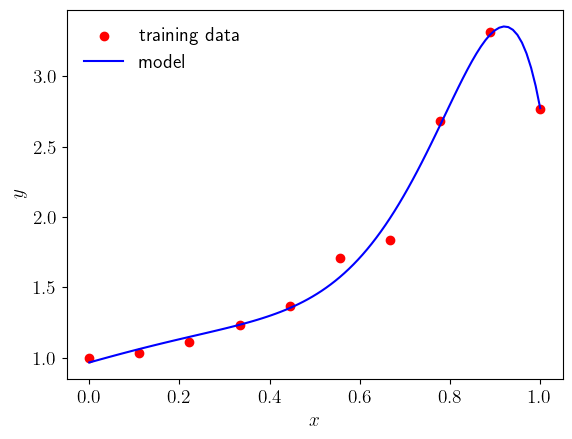

In [27]:
%run ../src.ipynb
%run ../utils.ipynb

x = np.linspace(0,1,10)
np.random.seed(0)
y = np.power(x,2)+1+2*np.power(x,2)*np.random.rand(x.size)
x = np.reshape(x,(-1,1))

# feature scaling
# mu = np.mean(x, axis=0)
# sigma = np.std(x, axis=0)

# xScaled = (x-mu)/sigma

maxVal = x.max(0)
minVal = x.min(0)
xScaled = (x-minVal)/(maxVal-minVal)# between 0 and 1

N = 10 # high order to induce overfitting
xScaledMapped = feature_mapping(xScaled,N)

m, n = xScaledMapped.shape;
w0 = np.zeros(n)
w0[1] = 0
b0 = 0
alpha = 0.5
numberIterations = 50000

w,b,J = gradient_descent(xScaledMapped,y,w0,b0,alpha,numberIterations,linear_regression_cost,linear_regression_gradient);
print(f"w = {w}, b = {b}")

def predictPLOT(x,xScaled,N,w,b):
    xTest = np.linspace(x[0],x[-1],100)
    xTestScaled = np.linspace(xScaled[0],xScaled[-1],100)
    xTestMapped = feature_mapping(xTestScaled,N)
    yhat = prediction_linear_regression(w,b,xTestMapped)
    plt.scatter(x,y,marker='o',c='r',label='training data')
    plt.plot(xTest,yhat,'-b',label='model')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(frameon=False)
    

predictPLOT(x,xScaled,N,w,b)
plt.show()

### Regularization

Iteration      0: Cost = 0.13225
Iteration    100: Cost = 0.05166
Iteration    200: Cost = 0.05165
Iteration    300: Cost = 0.05165
Iteration    400: Cost = 0.05165
Iteration    500: Cost = 0.05165
Iteration    600: Cost = 0.05165
Iteration    700: Cost = 0.05165
Iteration    800: Cost = 0.05165
Iteration    900: Cost = 0.05165
w = [ 0.64472667  0.68337123  0.57012595  0.41880334  0.26543638  0.12233076
 -0.00669922 -0.12114836 -0.2218227  -0.3100054 ], b = 1.0049307408927517


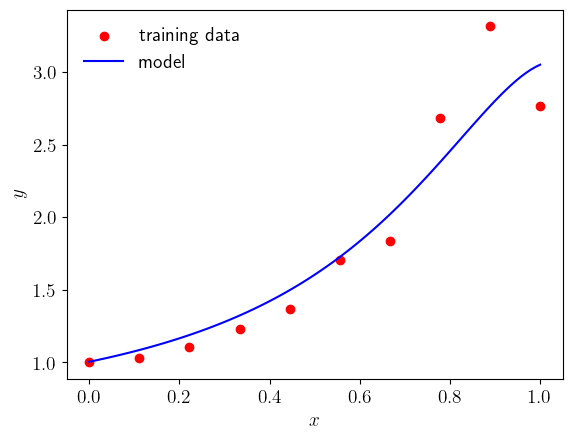

In [31]:
lambda_ = 0.3
numberIterations = 1000
w,b,J = gradient_descent_regularization(xScaledMapped,y,w0,b0,alpha,lambda_,numberIterations,linear_regression_cost,linear_regression_gradient);
print(f"w = {w}, b = {b}")

predictPLOT(x,xScaled,N,w,b)
plt.show()